# Autoencoders

# Case Study | Image Denoising with Fashion MNIST

## 1. Initial Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input

## 2. Loading and Processing the Data

In [2]:
# We don't need y_train and y_test
(x_train, _), (x_test, _) = fashion_mnist.load_data()
print('Max value in the x_train is', x_train[0].max())
print('Min value in the x_train is', x_train[0].min())

Max value in the x_train is 255
Min value in the x_train is 0


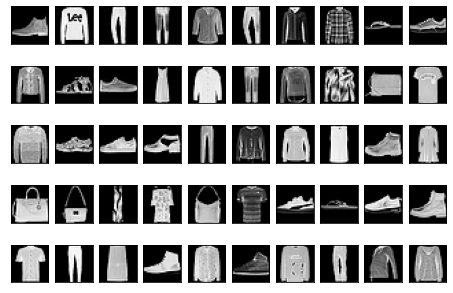

<Figure size 360x720 with 0 Axes>

In [5]:
# Let's take a sample of the dataset and plot the images with the following Matplotlib code:
fig, axs = plt.subplots(5, 10)
plt.figure(figsize=(5, 10))
fig.tight_layout(pad=-1)
a = 0
for i in range(5):
  for j in range(10):
    axs[i, j].imshow(tf.squeeze(x_test[a]))
    axs[i, j].xaxis.set_visible(False)
    axs[i, j].yaxis.set_visible(False)
    a = a + 1
    plt.gray()
plt.show

In [6]:
# normalization operation with the following lines:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [8]:
# from (60000, 28, 28) to (60000,28, 28, 1)

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## 3. Adding Noise to Images

In [9]:
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

In [10]:
# We also need to make sure that our array item values are within the range of 0 to 1. 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

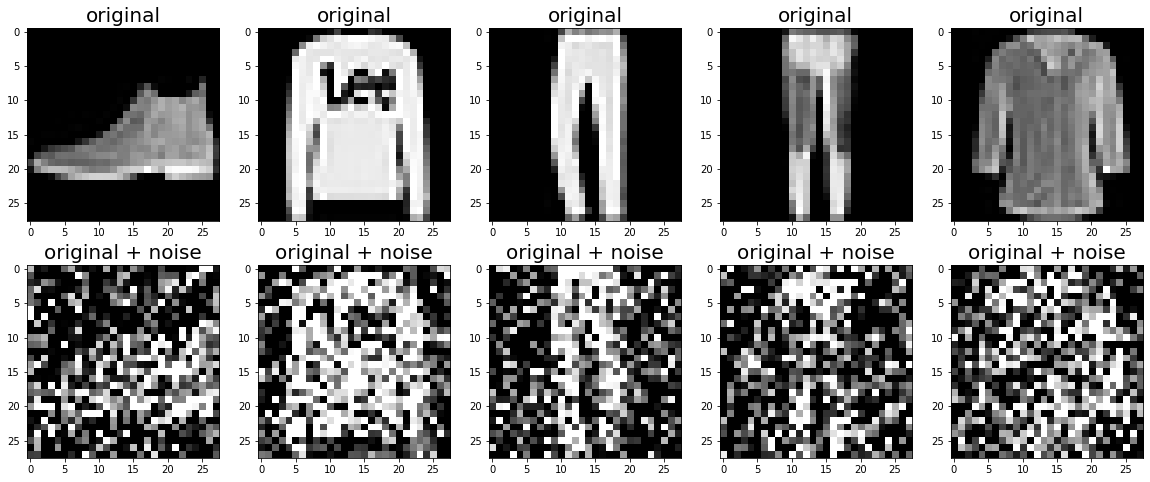

In [11]:
n = 5
plt.figure(figsize=(20, 8))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.title("original", size=20)
  plt.imshow(tf.squeeze(x_test[i]))
  plt.gray()
  
  bx = plt.subplot(2, n, n+ i + 1)
  plt.title("original + noise", size=20)
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()

plt.show()

## 4. Building the Model

In [12]:
class Denoise(tf.keras.Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([Input(shape=(28, 28, 1)),
                                        Conv2D(16, (3,3), activation='relu', padding='same',strides=2),
                                        Conv2D(8, (3,3), activation='relu', padding='same',strides=2)])
    self.decoder = tf.keras.Sequential([Conv2DTranspose(8, kernel_size=3, strides=2,activation='relu', padding='same'),
                                        Conv2DTranspose(16, kernel_size=3, strides=2,activation='relu', padding='same'),
                                        Conv2D(1, kernel_size=(3,3), activation='sigmoid',padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
# Let’s create a model object with the following code:
autoencoder = Denoise()

## 5. Compile and fit

In [13]:
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.0490 - val_loss: 0.0250
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0248 - val_loss: 0.0241
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0239 - val_loss: 0.0234
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0232 - val_loss: 0.0230
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0229 - val_loss: 0.0228
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0228 - val_loss: 0.0226
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0224 - val_loss: 0.0224
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0224 - val_loss: 0.0223
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.02

## 6. Denoising Noisy Images

In [16]:
# For now, running the following lines to denoise the noisy test images:
encoded_imgs=autoencoder.encoder(x_test).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs).numpy()

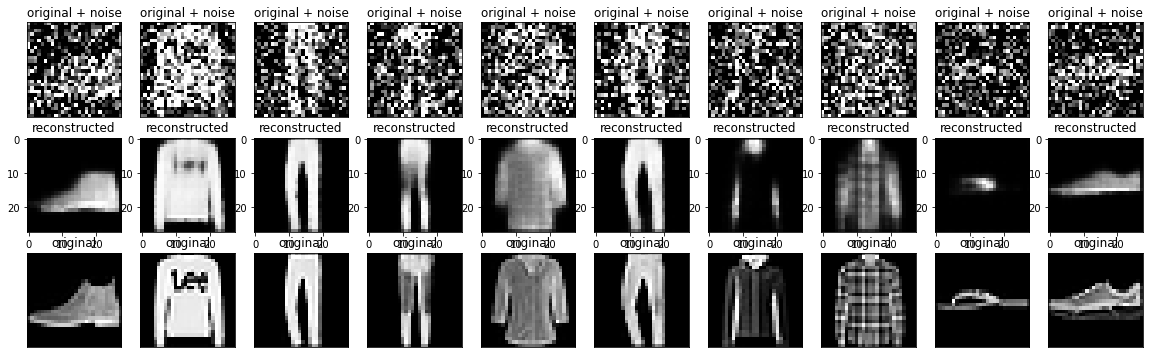

In [17]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
  # display original + noise
  bx = plt.subplot(3, n, i + 1)
  plt.title("original + noise")
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  # display reconstruction
  cx = plt.subplot(3, n, i + n + 1)
  plt.title("reconstructed")
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  plt.gray()
  bx.get_xaxis().set_visible(False)
  bx.get_yaxis().set_visible(False)
  
  # display original
  ax = plt.subplot(3, n, i + 2*n + 1)
  plt.title("original")
  plt.imshow(tf.squeeze(x_test[i]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()